# <u>Avocado Dataset Analysis and ML Prediction</u>

## Table of Contents

* [Problem Statement](#section1)<br>
* [Data Loading and Description](#section2)
* [Data Profiling](#section3)
    - * [Understanding the Dataset](#section4)<br/>
    - * [Profiling](#section5)<br/>
    - * [Preprocessing](#section6)<br/>
* [Data Visualisation and Questions answered](#section7)<br/>
    - * [Q.1 Which type of Avocados are more in demand (Conventional or Organic)?](#section8)<br/>
    - * [Q.2 What is the Average price of organic and conventional avocado for different years?](#section9)<br/>
    - * [Q.3 In which range Average price lies, what is distribution look like?](#section10)<br/>
    - * [Q.4 How is the Price distribution of avocados based on type - Conventional, Organic ?](#section11)<br/>
    - * [Q.5 How Average price is distributed over the months for Conventional and Organic Types?](#section12)<br/>
    - * [Q.6 What are TOP 5 regions where Average price is very high?](#section13)<br/>
    - * [Q.7 What are TOP 5 regions where Average consumption is very high?](#section14)<br/>
    - * [Q.8 In which year and for which region was the Average price the highest?](#section15)<br/>
        - [Which regions have recorded least, highest and most variance in Average Prices for Conventional Avocados?](#section16)<br/>
        - [Which regions have recorded least, highest and most variance in Average Prices for Organic Avocados?](#section17)<br/> 
    - * [Q.9 How price is distributed over the different days in a month?](#section18)<br/>
       - [ Lets see how price is distributed over different days in a month for Organic and Conventional Avocados](#section19)<br/> 
    - * [Q.10 How dataset features are correlated with each other?](#section20)<br/>
* [Feature Engineering for Model building](#section21)<br/>
* [Model selection/predictions](#section22)<br/>
    - * [P.1 Are we good with Linear Regression? Lets find out.](#section23)<br/>
    - * [P.2 Are we good with Decision Tree Regression? Lets find out.](#section24)<br/>
    - * [P.3 Are we good with Random Forest Regressor? Lets find out.](#section25)<br/>
    - * [More metrics to evaluate our models- Score and Explained Variance score for each of the models](#section26)<br/>
    - * [Lets see final Actual Vs Predicted sample.](#section27)<br/>
* [Conclusions](#section28)<br/>  

<a id=section1></a>

### * Problem Statement

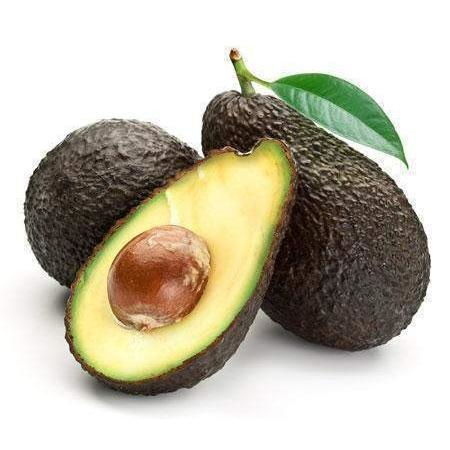

- In this study, we will try to see if we can predict the Avocado’s Average Price based on different features. The features are different (Total Bags,Date,Type,Year,Region…).

<ul>The variables of the dataset are the following:</ul>

* Categorical: ‘region’,’type’
* Date: ‘Date’
* Numerical:’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
* Target:‘AveragePrice’


<a id=section2></a>

### * Data Loading and Description

- This data was taken from the Hass Avocado Board website as of May of 2018.
- Represents weekly 2018 retail scan data for National retail volume (units) and price.
- The dataset comprises of __18249 observations of 14 columns__. Below is a table showing names of all the columns and their description.

<table>
<tr><th>Features</th><th>Description</th></tr>
<tr><td>‘Unamed: 0’</td><td>Its just a index feature that will be removed later</td></tr>
<tr><td>‘AveragePrice’</td><td>Average price of Avocados</td></tr>   
<tr><td>‘Total Volume’</td><td>Total sales volume of avocados</td></tr>
<tr><td>‘4046’</td><td>Total sales volume of  Small/Medium Hass Avocado</td></tr>
<tr><td>‘4225’</td><td>Total sales volume of Large Hass Avocado</td></tr>
<tr><td>‘4770’</td><td>Total sales volume of Extra Large Hass Avocado</td></tr>
<tr><td>‘Total Bags’</td><td>Total number of Bags sold</td></tr>
<tr><td>‘Small Bags’</td><td>Total number of Small Bags sold</td></tr>
<tr><td>‘Large Bags’</td><td>Total number of Large Bags sold</td></tr>
<tr><td>‘XLarge Bags’</td><td>Total number of XLarge Bags sold</td></tr>
<tr><td>‘type’</td><td>Tof Avocados sold</td></tr>
<tr><td>‘year’</td><td>Year in which the avocados were sold</td></tr>
<tr><td>‘Region’</td><td>Region in which the Avocados sold</td></tr>
</table>

### * Importing packages

In [1]:
import pandas as pd
import matplotlib
matplotlib.use("Agg", warn=False)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline

#!pip install plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

#### Read in the Avocado Prices csv file as a DataFrame called df

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

<a id=section3></a>

### * Data Profiling

<a id=section4></a>

### * Understanding the Avocado Dataset

 - Lets check our data shape

In [3]:
df.shape

(18249, 14)

- __Dataset__  has __18249 rows__ and __14 columns.__

In [4]:
df.columns  # This will print the names of all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.head()  # Will fetch us first 5 records

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Observation :
- The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it in pre-processing !

In [8]:
df.tail()  # This will print the last n rows of the Data Frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [9]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


#### Observation :
- Well, we can see that we are lucky as we dont have any missing values (__18249__ complete data) and __13 columns__. Now let's do some Feature Engineering on the Date Feature in __pre-processing__ later so we can be able to use the day and the month columns in building our machine learning model later. ( We didn't mention the year because its already there in data frame)

In [10]:
# Use include='all' option to generate descriptive statistics for all columns
# You can get idea about which column has missing values using this
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- We can see all columns having count __18249__. Looks like it doesn't contain missing values

In [11]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- We can see that __no missing values__ exist in dataset, that's great!

<a id=section5></a>

### * Profiling

In [12]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="avocado_before_preprocessing.html")

- We have done Pandas Profiling before preprocessing dataset, so we can get initial observations from the dataset in better visual aspects, to find correlation matrix and sample data. File was saved as html file __avocado_before_preprocessing.html__.

- Will take a look at the file and see what useful insight we can get from it. <br/>

- Initial observation as a result from profiling of __Avocado Dataset__ can be seen in  __avocado_before_preprocessing.html__
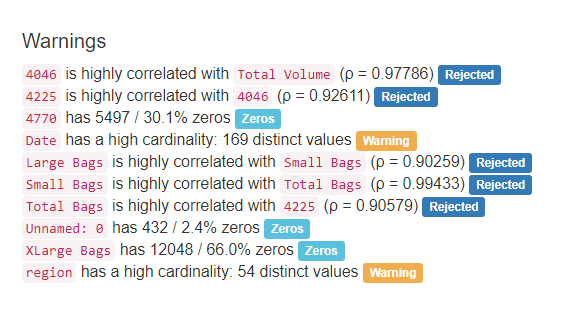

<a id=section6></a>

### * Preprocessing

- The Feature __"Unnamed:0"__ is just a representation of the indexes, so lets remove it now !

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

- Lets check our data head again to make sure that the Feature __Unnamed:0 is removed__

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Earlier in __info__ we have seen that __Date__ is __Object__ type not the date type. We have to change its type to datetime.
- Also we are extracting __Day__ and __Month__ into separate varibles to use it later in our EDA. 

In [15]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

- Lets check the head to see what we have in our dataframe so far

In [16]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<a id=section7></a>


### * Data Visualisation and Questions answered

__**Organic vs Conventional**__ : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset

<a id=section8></a>

- __Q.1 Which type of Avocados are more in demand (Conventional or Organic)?__

In [17]:
Type=df.groupby('type')['Total Volume'].agg('sum')
values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

#### Observation : 
- Just over __3% of our dataset is organic__. So looks like __Conventional is in more demand__. Now, let's look at the average price distribution.

<a id=section9></a>

-  __Q.2 What is the Average price of organic and conventional avocado for different years?__

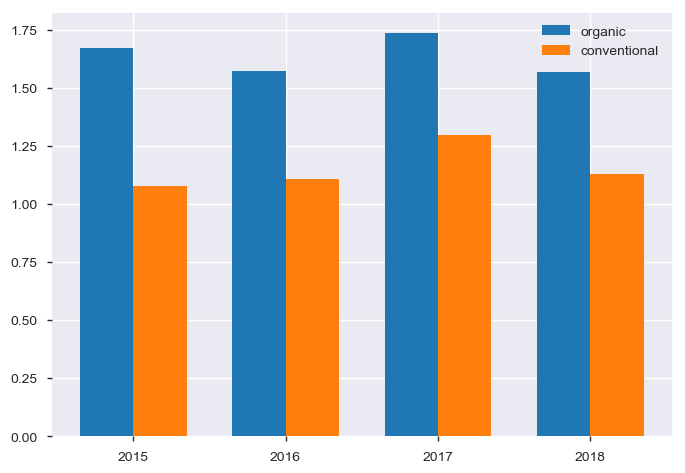

In [18]:
datayearorganic = []
datayearconventional = []
for i in df.year.unique():
    datayearorganic.append(df[(df.year == i) & (df['type'] == 'organic')].AveragePrice.mean())
    datayearconventional.append(df[(df.year == i) & (df.type == 'conventional')].AveragePrice.mean())
bar_width = 0.35
plt.bar(np.arange(df.year.nunique()),datayearorganic,bar_width, label = 'organic')
plt.bar(np.arange(df.year.nunique())+bar_width,datayearconventional,bar_width, label = 'conventional')
plt.xticks(np.arange(df.year.nunique())+bar_width/2,df.year.unique())
plt.legend()
plt.show()

#### Observation :
From the above plot, we can see that the __price of Organic Avocados has been consistently high over all the years__ when compared to conventional fruits, despite the __demand being high for Conventional Avocados.__ 

<a id=section10></a>

<a id=section10></a>

- __Q.3 In which range Average price lies, what is distribution look like?__

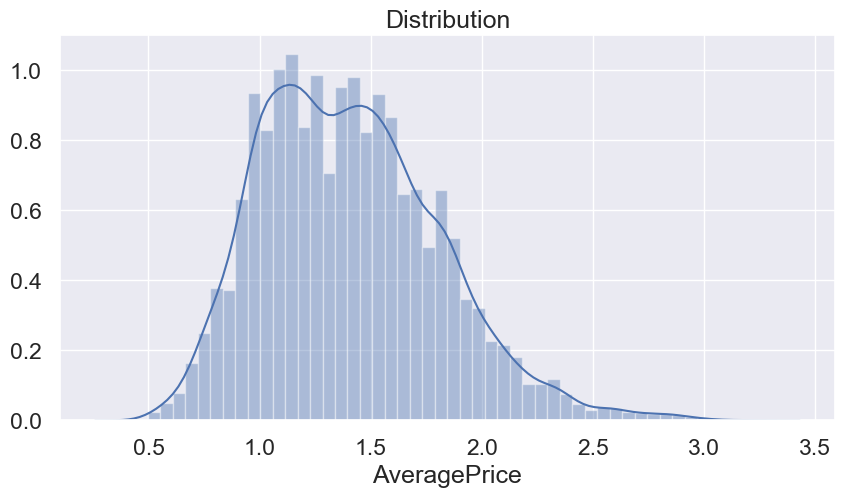

In [21]:
from scipy.stats import norm
import pylab as pl
pl.figure(figsize=(10,5))
pl.title("Distribution")
ax = sns.distplot(df["AveragePrice"], color = 'b')

<a id=section11></a>

 - __Q.4  How is the Price distribution of avocados based on type - Conventional, Organic ?__

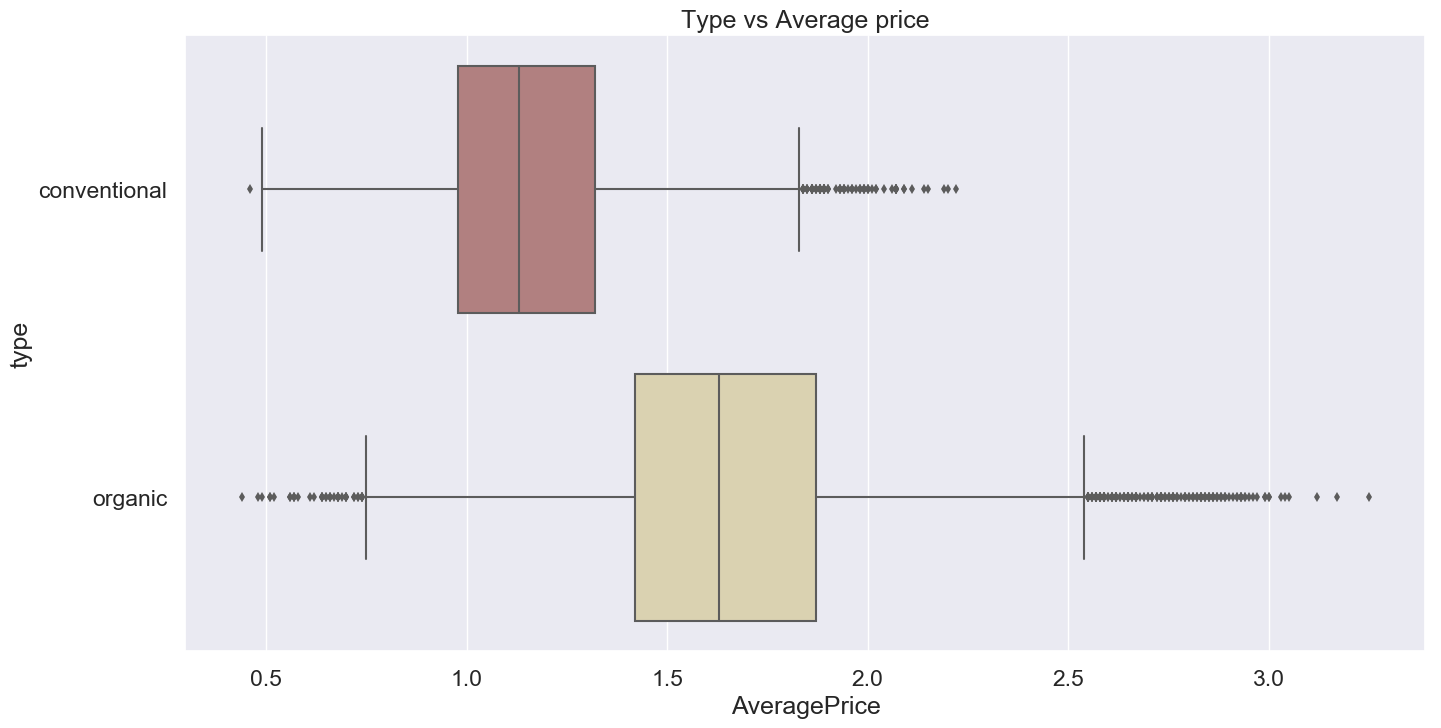

In [23]:
plt.figure(figsize=(16,8))
plt.title("Type vs Average price")
ax=sns.boxplot(y='type',x='AveragePrice',data=df, palette='pink')

#### Observation :
- Average Price distribution shows that for most cases __price of avocado is between 1.1, 1.4.__

- Let's look at average price of conventional vs. organic. 

<a id=section12></a>

- __Q.5 How Average price is distributed over the months for Conventional and Organic Types?__

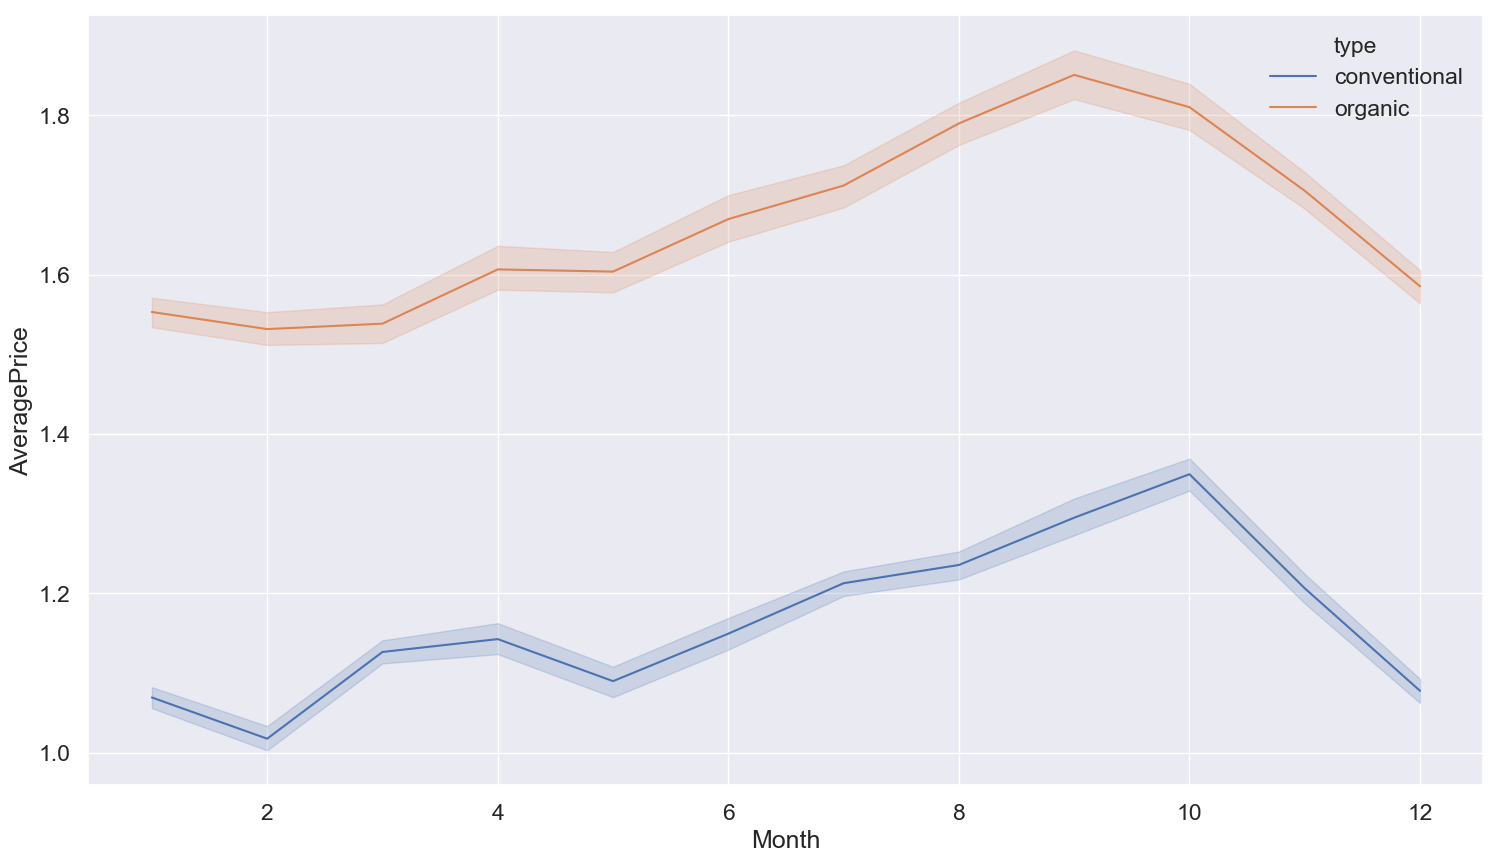

In [24]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

#### Observation :
- Looks like there was a __hike in price between months August and October for both Conventional and Organic type__ for Avocados.

###  * Now lets plot Average price distribution based on region 

<a id=section13></a>

- __Q.6 What are TOP 5 regions where Average price is very high?__

Text(0.5,1,'Average Price of Avocado according to Region')

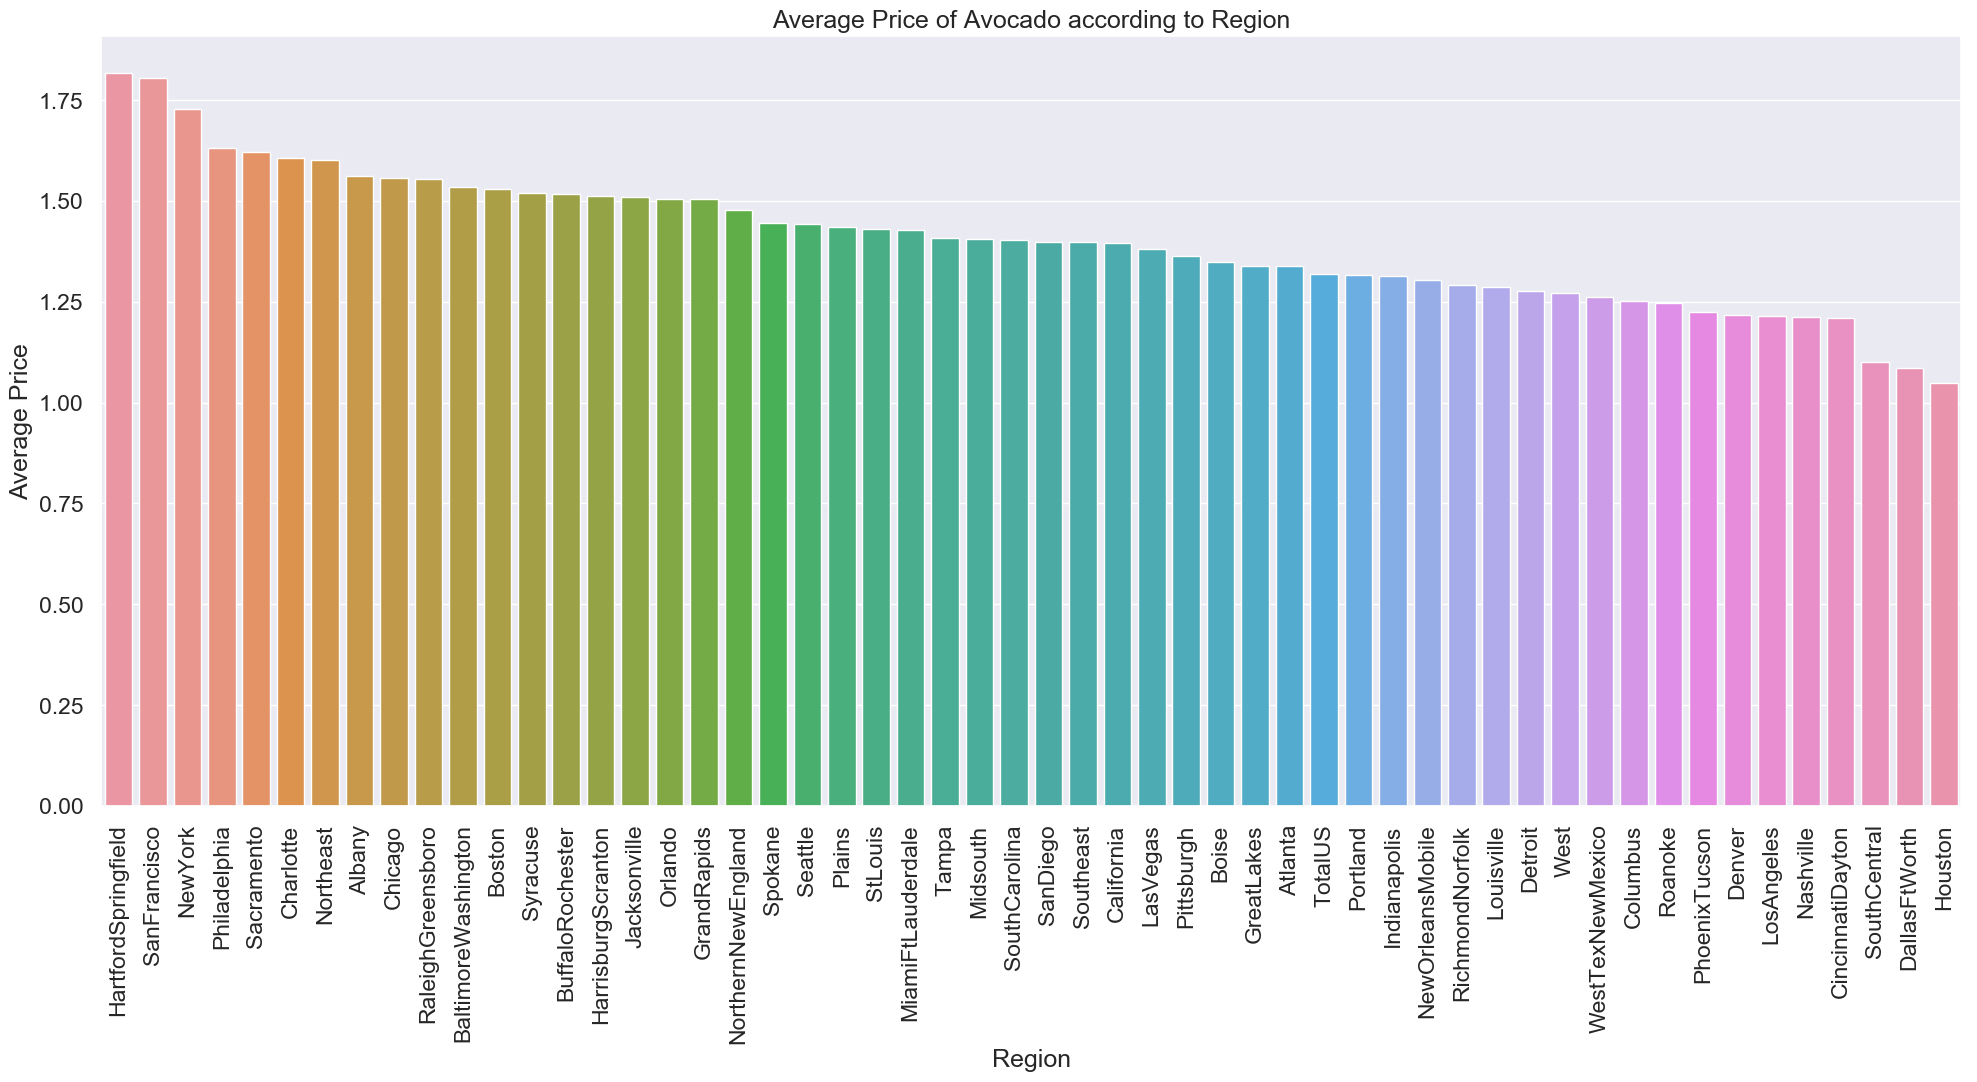

In [26]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado according to Region')

#### Observation :
- <ul>Below are the top 5 regions where price is very high
<ul><b><li>HartfordSpringfield</li>
<li>SanFrancisco</li>
<li>NewYork</li>
<li>Philadelphia</li>
    <li>Sacramento</li></b></ul></ul>

<a id=section14></a>

- __Q.7 What are TOP 5 regions where Average consumption is very high?__

Text(0.5,1,'Average of Total Volume according to Region')

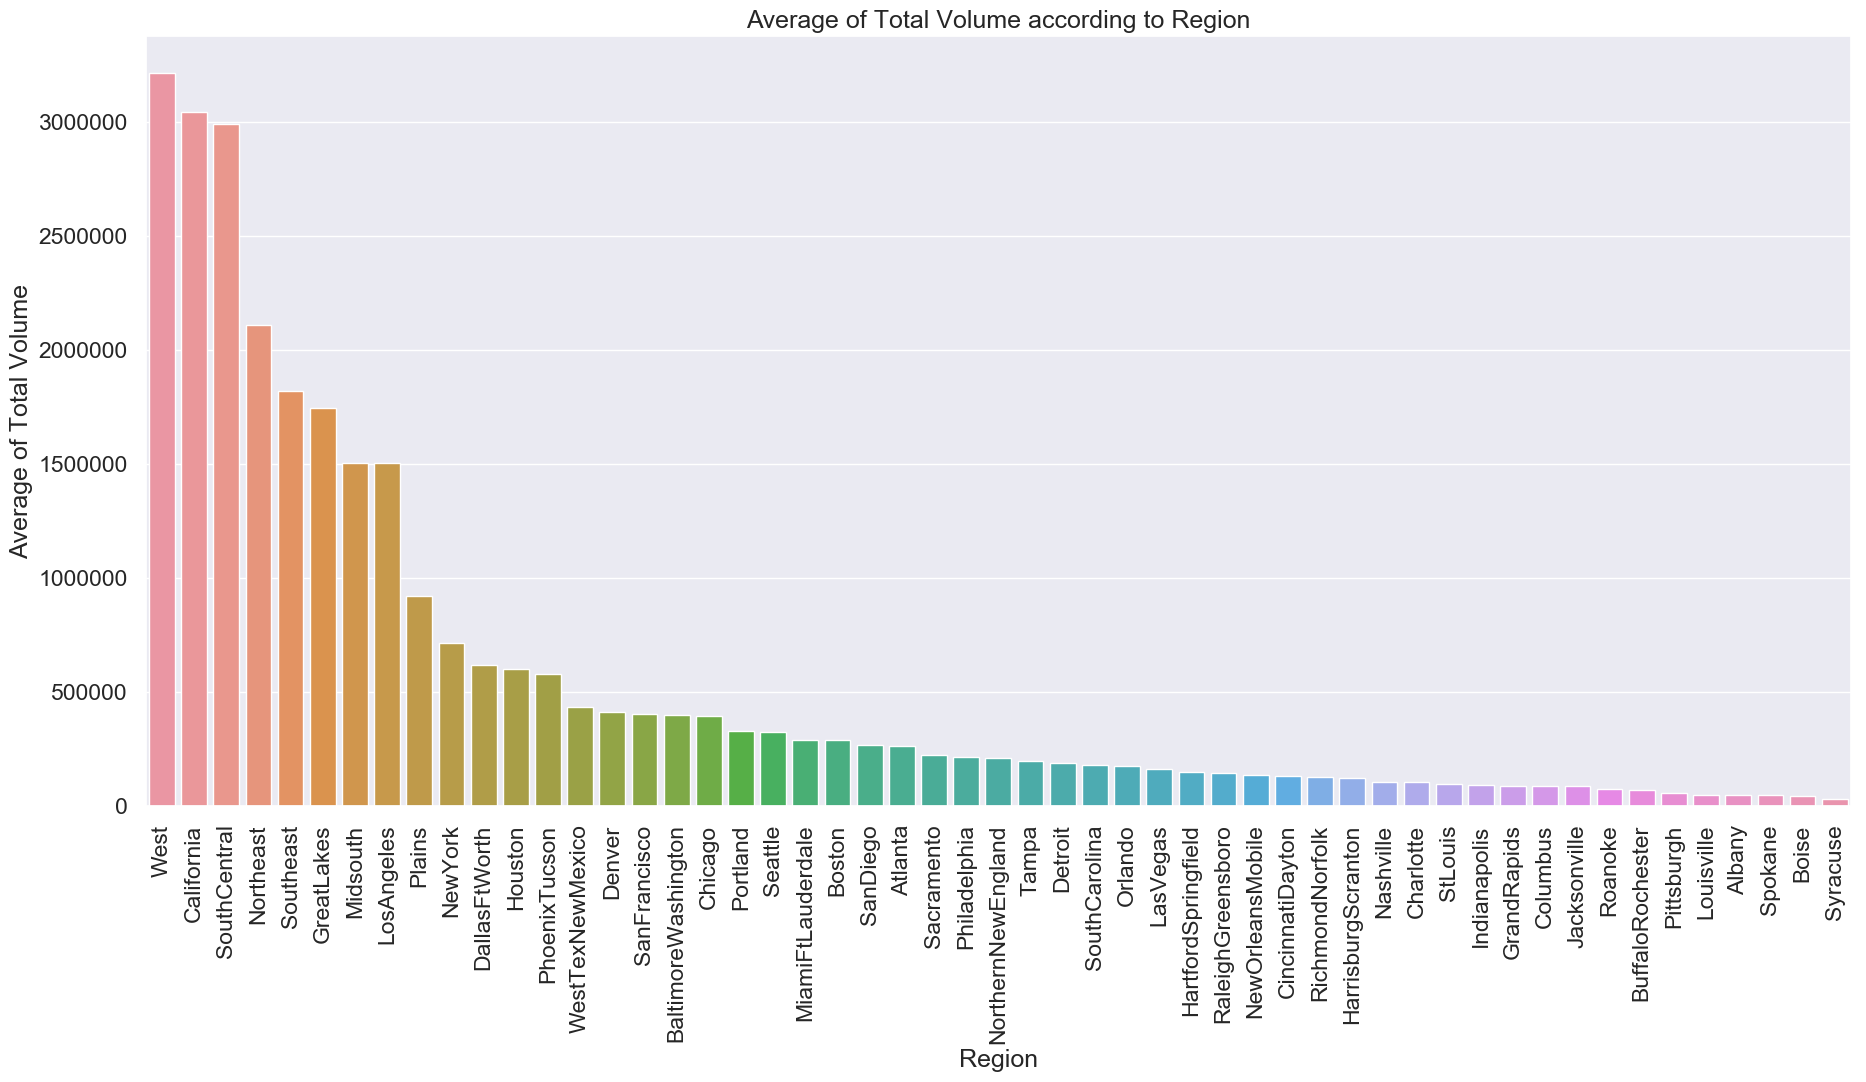

In [27]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume according to Region')

#### Observation : 
- <ul>Below are the top 5 regions where Consumption is very high
<ul><b><li>West</li>
<li>California</li>
<li>SouthCentral</li>
<li>Northeast</li>
    <li>Southeast</li></b></ul></ul>

<a id=section15></a>

- __Q.8 In which year and for which region was the Average price the highest?__

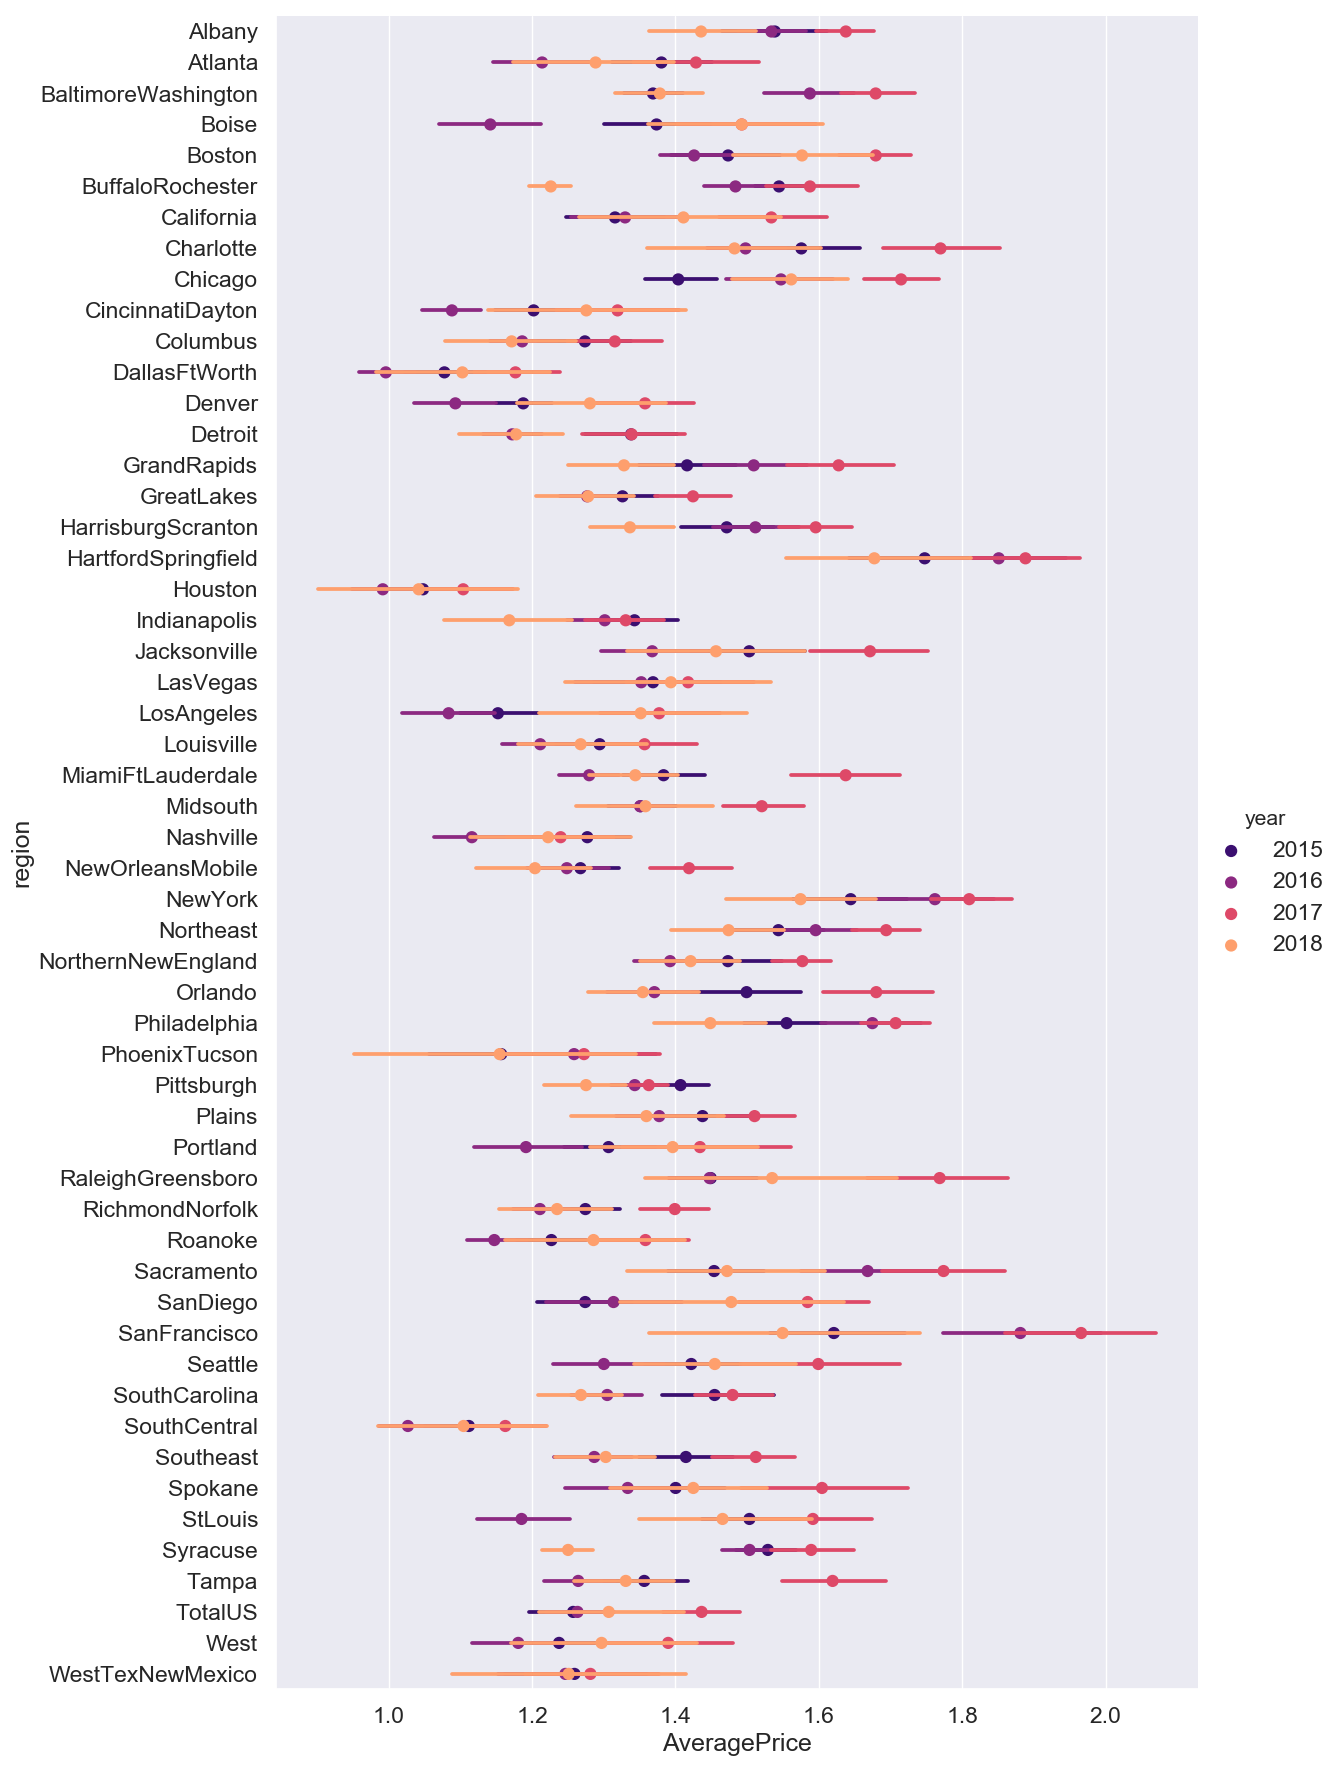

In [28]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='magma',
                   join=False,
              )

#### Observation :
There was a __huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region.__

<a id=section16></a>

- __Which regions have recorded least, highest and most variance in Average Prices for Conventional Avocados?__

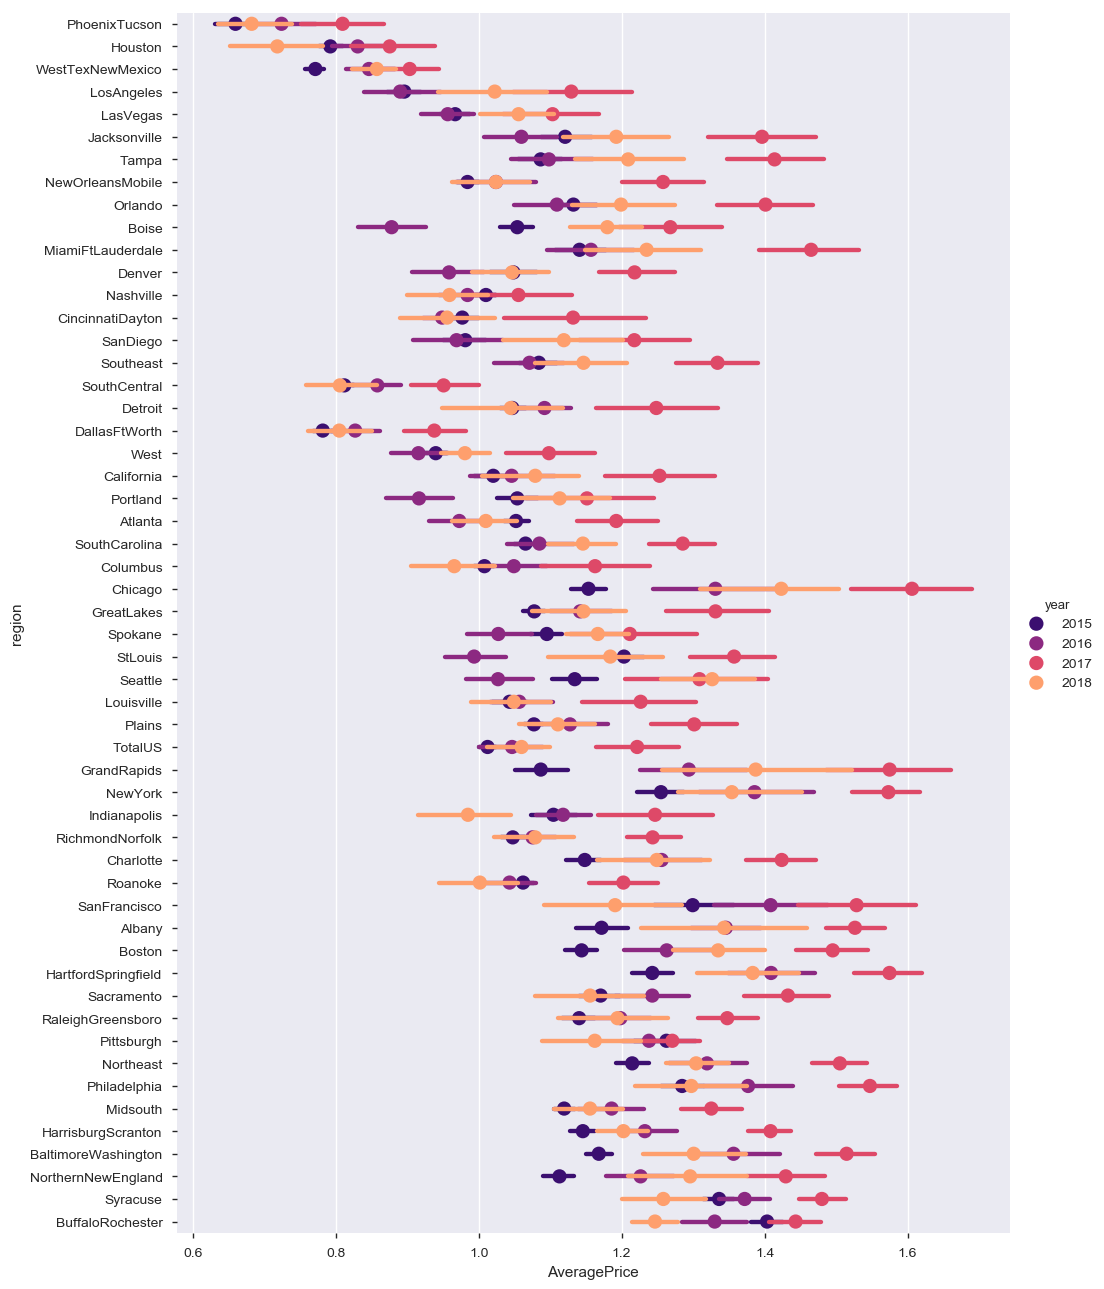

In [62]:
conventional_df=df[df['type'].isin(['conventional'])]
conventional_df = conventional_df.sort_values(by = 'AveragePrice')
ax = sns. factorplot('AveragePrice', 'region' , data = conventional_df, hue = 'year',
                    height = 13,
                    aspect = 0.8,
                    palette = 'magma',
                    join= False)

#### Observation :
- __PhoenixTucson__ has the least AveragePrice of conventional avocado from 2015 to 2018.
-  __BuffaloRochester__ has the most AveragePrice of conventional avocado from 2015 to 2018. 
-  The region having the most variance in AveragePrice through 2015 to 2016 is __GrandRapids__.

<a id=section17></a>

- __Which regions have recorded least, highest and most variance in Average Prices for Organic Avocados?__

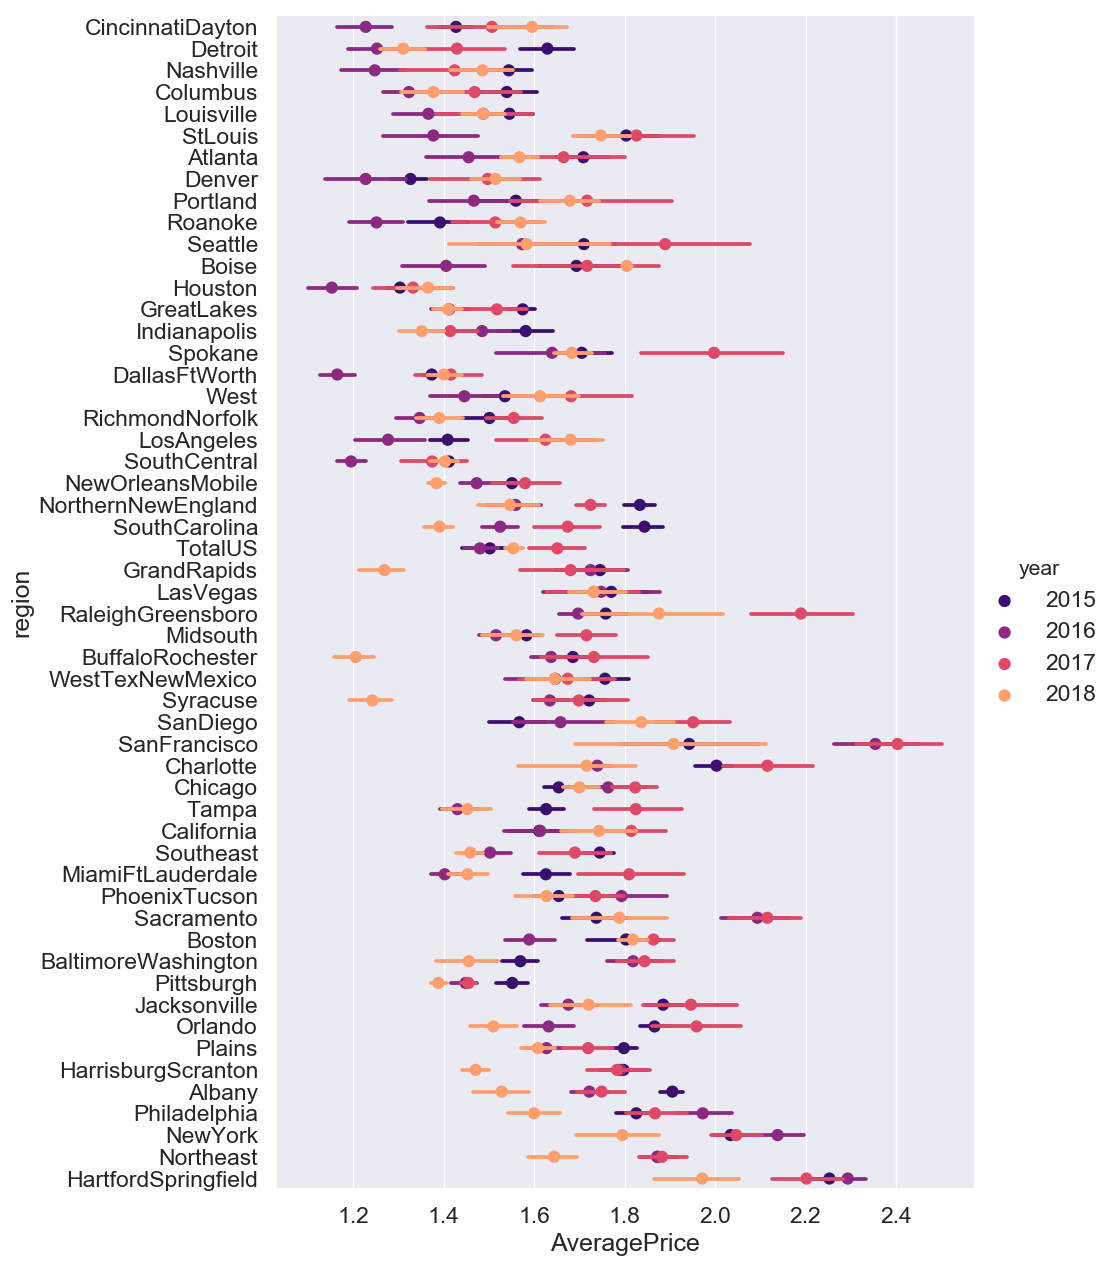

In [30]:
organic_df=df[df['type'].isin(['organic'])]
organic_df = organic_df.sort_values(by = 'AveragePrice')
ax = sns. factorplot('AveragePrice', 'region' , data = organic_df, hue = 'year',
                    height = 13,
                    aspect = 0.8,
                    palette = 'magma',
                    join= False)

#### Observation :
- __Houston__ region has the least average price through 2015 to 2018.
-  __SanFransisco__ region has the most AveragePrice from 2015 to 2018.
-  __BuffalloRochester__ region has the most variance in Average price during 2015 to 2018.

<a id=section18></a>

- __Q.9 How price is distributed over the different days in a month?__

Text(0.5,1,'Average Price')

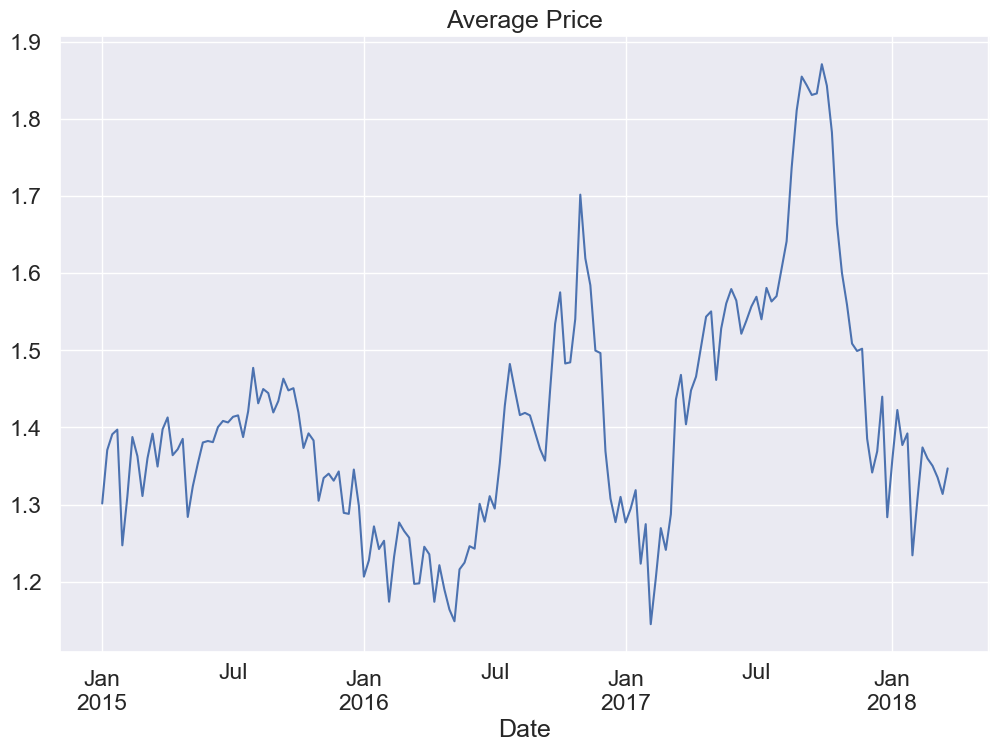

In [31]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

 #### Observation :
 - This shows there was a huge hike in prices after __July 2017 and before Jan 2018__. This was also confirmed in earlier graph too.

<a id=section19></a>

- __Lets see how price is distributed over different days in a month for Organic and Conventional Avocados__

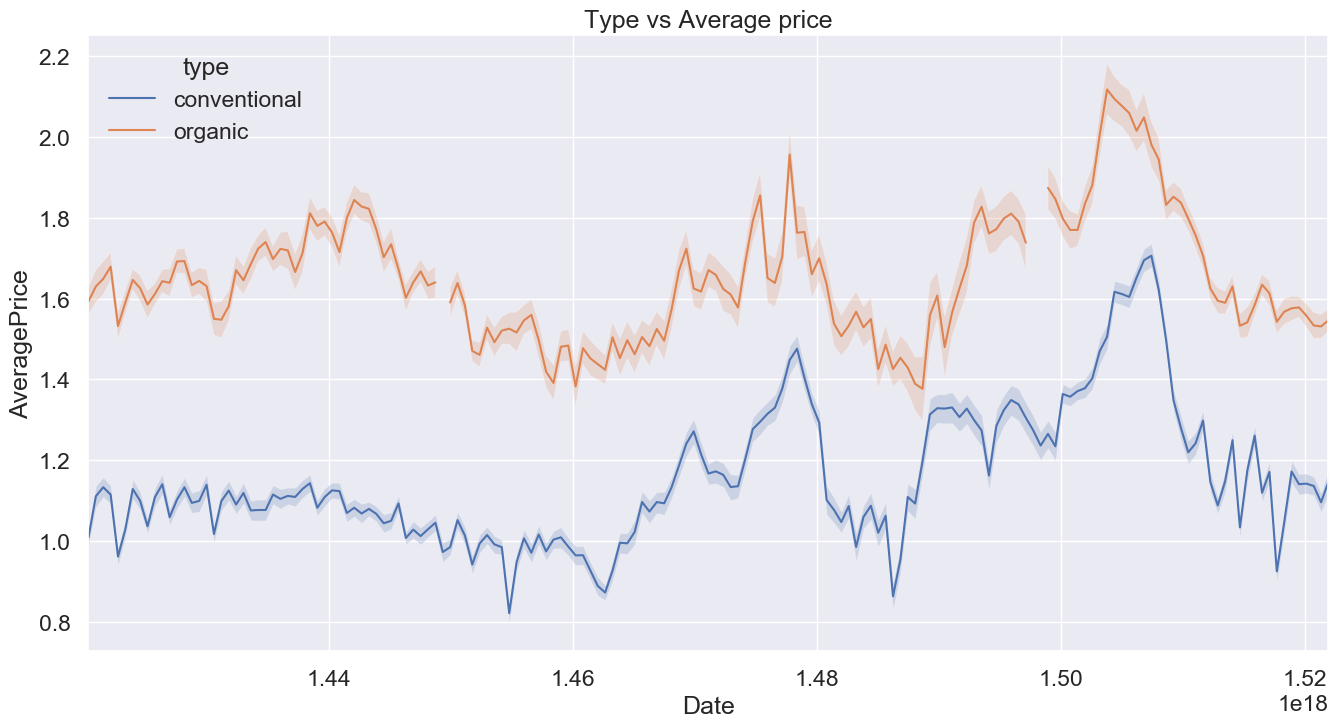

In [32]:
plt.figure(figsize=(16,8))
plt.title('Type vs Average price')
ax=sns.tsplot(data=df,time='Date',unit='region',condition='type',value='AveragePrice')

#### Observation :
- The organic avocado is more expensive than conventional one. However, the shadows for the two types may indicate that the average price differs a lot in regions and years.


__Now lets have an idea about the relationship between our Features(Correlation)__

<a id=section20></a>

- __Q.10 How dataset features are correlated with each other?__

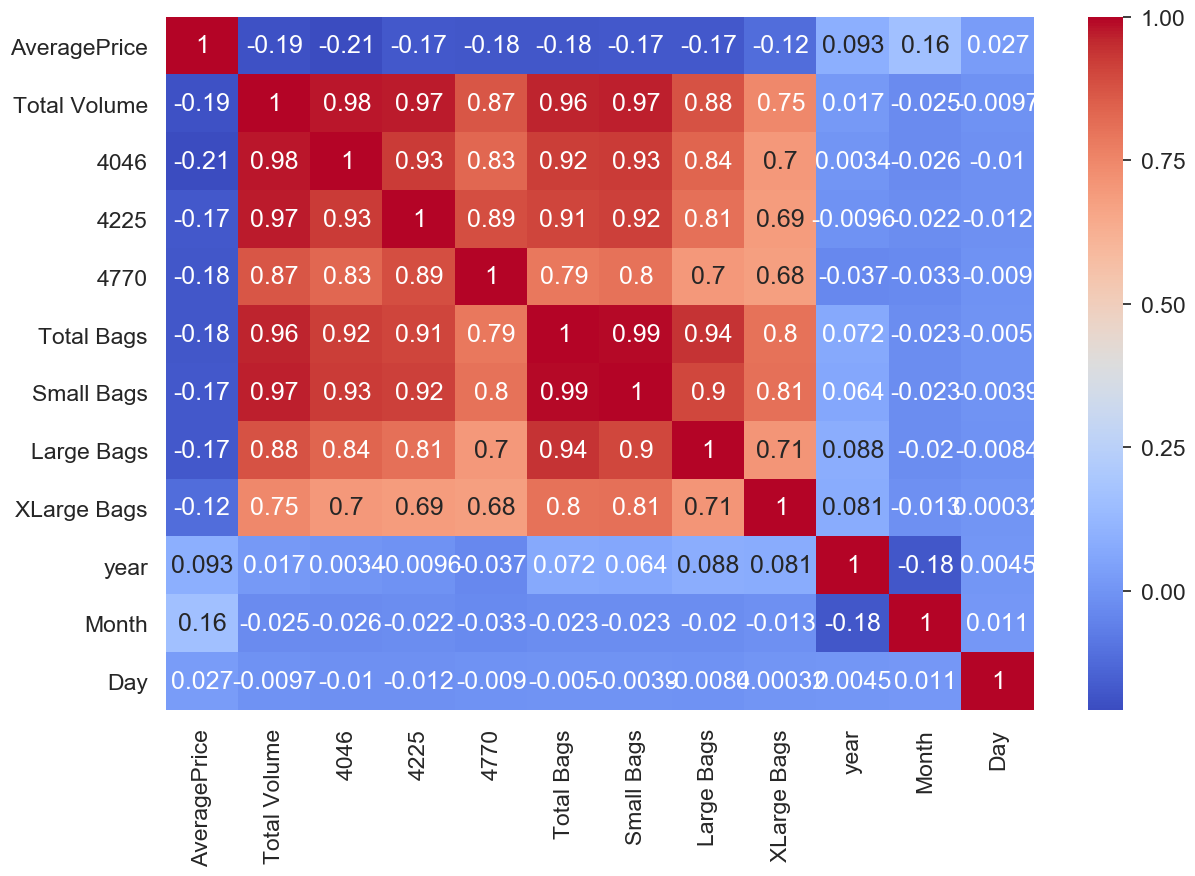

In [33]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

#### Observation :
- As we can see from the heatmap above, all the Features are not correleted with the __Average Price column__, instead most of them are correlated with each other. So we will have to try and findout what features would help drive us create a good model. 

- First we have to do some Feature Engineering on the __categorical Features : region and type__

<a id=section21></a>

## * Feature Engineering for Model building

In [34]:
df['region'].nunique()

54

In [35]:
df['type'].nunique()

2

- As we can see we have __54 regions__ and __2 unique types__, so it's going to be easy to transform the __type feature__ to dummies, but for the region its going to be a bit complex, so let's drop the entire column as it was proved not be relevant here.

- I will drop the Date Feature as well because we already have __3 other columns for the Year, Month and Day__.

In [36]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [37]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [38]:
df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


<a id=section22></a>

## * Model selection/predictions

- Now our data is ready! lets apply our model which is going to be the __Linear Regression because our Target variable 'AveragePrice' is continuous__.
- Let's now begin to train out regression model! We will need to first split up our data into an __X array that contains the features to train on__, and a __y array with the target variable__.

<a id=section23></a>

- __P.1 Are we good with Linear Regression? Lets find out.__

In [40]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=35)

  __Creating and Training the Model__

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [45]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print('R-squared:', metrics.r2_score(y_test, lr_pred))

MAE: 0.23156697559599232
MSE: 0.09111314502364783
RMSE: 0.3018495403734248
R-squared: 0.43518109690031215


- The __RMSE is low so we can say that we do have a good model but our R-squared value is also low , but lets check to be more sure__.
- Lets plot the __y_test vs the predictions__

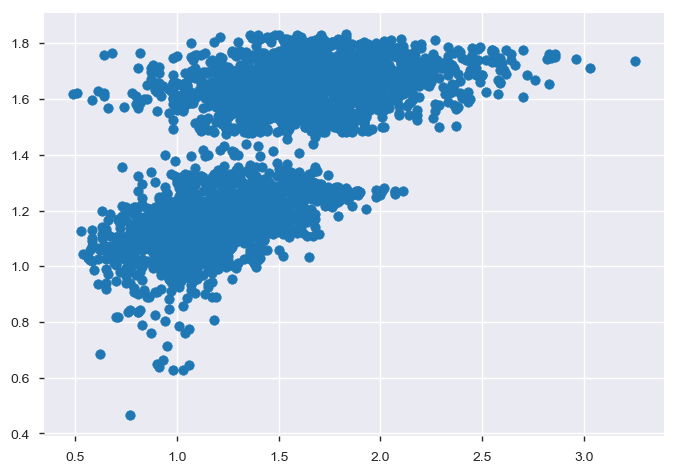

In [37]:
plt.scatter(x=y_test,y=lr_pred)

- As we can see that __we don't have a straight line so I am not sure that this is the best model we can apply on our data__

- Lets try working with the  __Decision Tree Regression model__

<a id=section24></a>

- __P.2 Are we good with Decision Tree Regression? Lets find out.__

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred=dtr.predict(X_test)

Text(0,0.5,'Predicted Y')

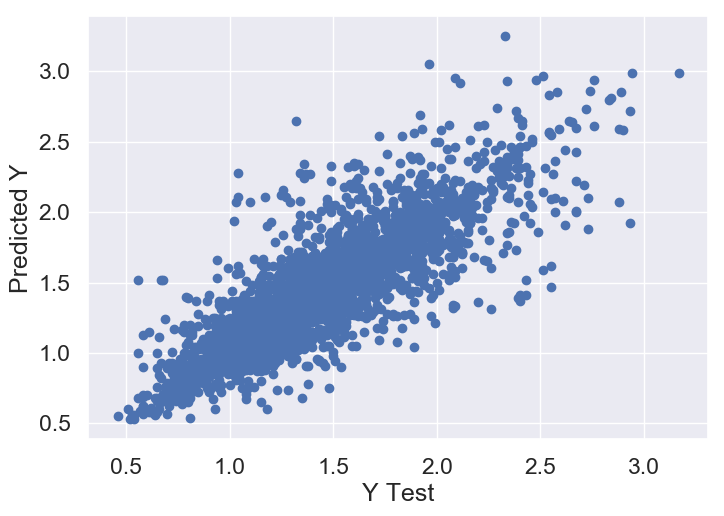

In [48]:
plt.scatter(x=y_test,y=dtr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

- Nice, here we can see that __we nearly have a straight line__, in other words __its better than the Linear regression model, and to be more sure lets check the RMSE__

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print('R-squared:', metrics.r2_score(y_test, dtr_pred))

MAE: 0.13566027397260272
MSE: 0.04425419178082192
RMSE: 0.2103668029438626
R-squared: 0.7256641283459196


- Very Nice, our __RMSE is lower and the R-squared improved than the previous one we got with Linear Regression__. Now I am going to try one last model to see if I can __improve my predictions for this data which is the RandomForestRegressor__

<a id=section25></a>

- __P.3 Are we good with Random Forest Regressor? Lets find out.__

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred=rfr.predict(X_test)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('R-squared:', metrics.r2_score(y_test, rfr_pred))

MAE: 0.10776575342465754
MSE: 0.024330455616438356
RMSE: 0.15598222852760618
R-squared: 0.8491732312650866


- Well as we can see the __RMSE is lower than the two previous models and the r-square is close to 1 which means that the model is a good fit__, so the __RandomForest Regressor is the best model to predict Avocados prices.__

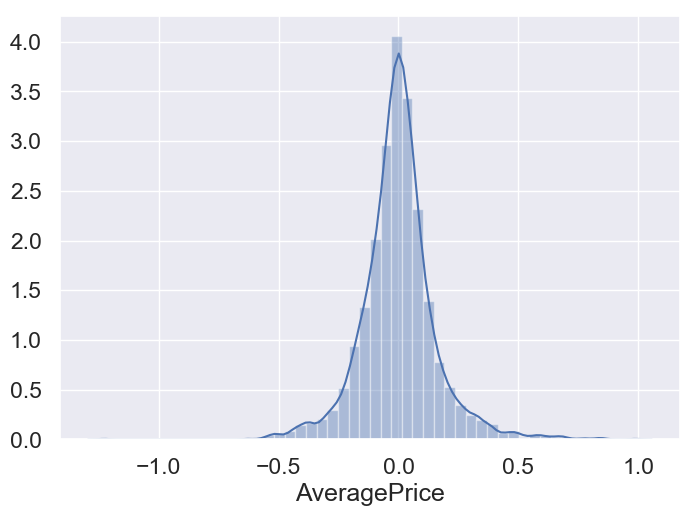

In [55]:
sns.distplot((y_test-rfr_pred),bins=50)

#### Observation :
- Notice here that our __residuals looked to be normally distributed__ and that's really a __good sign which means that our model was a correct choice for the data.__ 

<a id=section26></a>

### More metrics to evaluate our models- Score and Explained Variance score for each of the models

In [56]:
from sklearn.metrics import explained_variance_score
# For Linear Regression model
lr_score = lr.score(X_test,y_test)
expl_lr = explained_variance_score(lr_pred,y_test)

#For Decision Tree model
dtr_score=dtr.score(X_test,y_test)
expl_dtr = explained_variance_score(dtr_pred,y_test)

# For Random Forest Regressor model
rdr_score=rfr.score(X_test,y_test)
expl_rdr = explained_variance_score(rfr_pred,y_test)

In [57]:
print("Linear Regression Model Score is ",round(lr.score(X_test,y_test)*100))
print("Decision tree Regression Model Score is ",round(dtr.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rfr.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[lr_score,dtr_score,rdr_score],
                            'Explained Variance Score':[expl_lr,expl_dtr,expl_rdr]
                           })
models_score.sort_values(by='Score',ascending=False)

Linear Regression Model Score is  44.0
Decision tree Regression Model Score is  73.0
Random Forest Regression Model Score is  85.0


,Model,Score,Explained Variance Score
2,Random forest Regression,0.849173,0.814227
1,Decision Tree,0.725664,0.730265
0,Linear Regression,0.435181,-0.330417


<a id=section27></a>

- __Lets see final Actual Vs Predicted sample.__

,Y Test,Pred
2891,0.79,0.831
780,1.01,1.027
16400,2.12,1.986
2259,1.25,1.186
14051,2.03,1.939


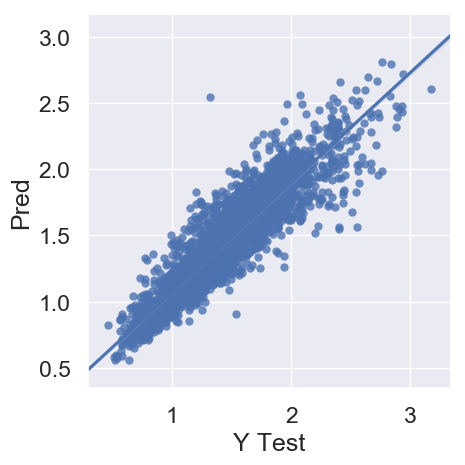

In [61]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':rfr_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

<a id=section28></a>

## * Conclusions

- __Conventional Avocados are in more demand when compared to Organic Avocados__. Despite that, the __average price of Organic Avocados has been consistently high over all the years__ when compared to conventional ones.
- For most regions over all the years, the __price of avocado is between 1.1 and 1.4__
- There was a hike in price between __months of August and October for both Conventional and Organic type__ for Avocados.
- __Conventional Avocados__
    * __HartfordSpringfield__ has sold avocados for highest prices followed by __SanFrancisco and NewYork regions__.
    * __PhoenixTucson__ has the least AveragePrice over all the years.
- __Organic Avocados__
    * __West__ is the region that has highest consumption of avocados over all the years followed by __California and SouthCentral regions__.
- The AveragePrice varies in regions(this may be inferred as region plays a critical role in predicting AveragePrice), and the AveragePrice of conventional avocado was getting more expensive from 2015 to 2018 regardless of regions.
- There was a __huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region.__

### Price Predictions using Machine Learning Models
- As we are predicting __AveragePrice__ which is continuous in nature, we have to build Regression models. 
  We have built Linear Regression, Decision Tree Regressor and Random Forest Regressor and evaluated based on different metrics such as __MAE,MSE,RMSE,R-squared__. We found that Random Forest regressor is the model that best predicts the price with an __model score of 85%__. 